In [1]:
# Importing the drive module from the google.colab library
from google.colab import drive

# Mounting the Google Drive to the Colab environment
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Changing the current working directory to 'drive/MyDrive/Training_Data-ISY503/'
%cd drive/MyDrive/Training_Data-ISY503/

/content/drive/MyDrive/Training_Data-ISY503


In [3]:
# Import necessary libraries
import os                  # Operating system module
import random              # Random number generation module

import numpy as np         # Numerical computation library
import pandas as pd        # Data manipulation library for handling data in tabular form
import cv2                 # OpenCV library for computer vision tasks
import matplotlib.pyplot as plt  # Plotting library
import matplotlib.image as mpimg  # Image processing with matplotlib

from tensorflow import keras     # TensorFlow high-level API for deep learning
import tensorflow as tf          # TensorFlow library
from keras.models import Sequential   # Keras sequential model for building neural networks
from keras.layers import Convolution2D, MaxPooling2D, Dropout, Flatten, Dense, Conv2D  # Keras layers for building CNNs
from sklearn.utils import shuffle   # Utility for shuffling data
from sklearn.model_selection import train_test_split   # Utility for splitting data into training and testing sets
from imgaug import augmenters as iaa   # Image augmentation library
import ntpath           # Module for manipulating file paths

In [4]:
# Define the directory containing the CSV file and column names
datadir = 'Training_Data_Track01'  # Directory where the CSV file is located
columns = ['center', 'left', 'right', 'steering', 'throttle', 'reverse', 'speed']  # Define column names for the DataFrame

# Read CSV file into a pandas DataFrame
data = pd.read_csv(os.path.join(datadir, 'driving_log.csv'), names=columns)  # Load CSV file into DataFrame with specified column names
pd.set_option('display.max_colwidth', None)  # Set pandas option to display full column width

# Display the first few rows of the DataFrame (default is 5 rows)
data.head()

center  \
0  C:\Users\bryan_e7nopgx\Downloads\simulator-windows-64\Training_Data_001\IMG\center_2024_04_22_00_40_55_275.jpg   
1  C:\Users\bryan_e7nopgx\Downloads\simulator-windows-64\Training_Data_001\IMG\center_2024_04_22_00_40_55_380.jpg   
2  C:\Users\bryan_e7nopgx\Downloads\simulator-windows-64\Training_Data_001\IMG\center_2024_04_22_00_40_55_486.jpg   
3  C:\Users\bryan_e7nopgx\Downloads\simulator-windows-64\Training_Data_001\IMG\center_2024_04_22_00_40_55_592.jpg   
4  C:\Users\bryan_e7nopgx\Downloads\simulator-windows-64\Training_Data_001\IMG\center_2024_04_22_00_40_55_698.jpg   

                                                                                                            left  \
0   C:\Users\bryan_e7nopgx\Downloads\simulator-windows-64\Training_Data_001\IMG\left_2024_04_22_00_40_55_275.jpg   
1   C:\Users\bryan_e7nopgx\Downloads\simulator-windows-64\Training_Data_001\IMG\left_2024_04_22_00_40_55_380.jpg   
2   C:\Users\bryan_e7nopgx\Downloads\simulator-windows-64\Training_Data_001\IMG\left_2024_04_22_00_40_55_486.jpg   
3   C:\Users\bryan_e7nopgx\Downloads\simulator-windows-64\Training_Data_001\IMG\left_2024_04_22_00_40_55_592.jpg   
4   C:\Users\bryan_e7nopgx\Downloads\simulator-windows-64\Training_Data_001\IMG\left_2024_04_22_00_40_55_698.jpg   

                                                                                                            right  \
0   C:\Users\bryan_e7nopgx\Downloads\simulator-windows-64\Training_Data_001\IMG\right_2024_04_22_00_40_55_275.jpg   
1   C:\Users\bryan_e7nopgx\Downloads\simulator-windows-64\Training_Data_001\IMG\right_2024_04_22_00_40_55_380.jpg   
2   C:\Users\bryan_e7nopgx\Downloads\simulator-windows-64\Training_Data_001\IMG\right_2024_04_22_00_40_55_486.jpg   
3   C:\Users\bryan_e7nopgx\Downloads\simulator-windows-64\Training_Data_001\IMG\right_2024_04_22_00_40_55_592.jpg   
4   C:\Users\bryan_e7nopgx\Downloads\simulator-windows-64\Training_Data_001\IMG\right_2024_04_22_00_40_55_698.jpg   

   steering  throttle  reverse     speed  
0       0.0       0.0      0.0  0.000081  
1       0.0       0.0      0.0  0.000082  
2       0.0       0.0      0.0  0.000081  
3       0.0       0.0      0.0  0.000082  
4       0.0       0.0      0.0  0.000082

In [5]:
# Define a function to extract the file name from a given path
def path_leaf(path):
    head, tail = ntpath.split(path)  # Split the path into directory part ('head') and file part ('tail')
    return tail  # Return the file name extracted from the path

# Apply the 'path_leaf' function to extract file names from the 'center', 'left', and 'right' columns of the DataFrame
data['center'] = data['center'].apply(path_leaf)  # Apply 'path_leaf' to 'center' column and update DataFrame
data['left'] = data['left'].apply(path_leaf)      # Apply 'path_leaf' to 'left' column and update DataFrame
data['right'] = data['right'].apply(path_leaf)    # Apply 'path_leaf' to 'right' column and update DataFrame

# Display the first few rows of the updated DataFrame to verify changes
data.head()  # Display the first few rows of the DataFrame after applying the changes

center                              left  \
0  center_2024_04_22_00_40_55_275.jpg  left_2024_04_22_00_40_55_275.jpg   
1  center_2024_04_22_00_40_55_380.jpg  left_2024_04_22_00_40_55_380.jpg   
2  center_2024_04_22_00_40_55_486.jpg  left_2024_04_22_00_40_55_486.jpg   
3  center_2024_04_22_00_40_55_592.jpg  left_2024_04_22_00_40_55_592.jpg   
4  center_2024_04_22_00_40_55_698.jpg  left_2024_04_22_00_40_55_698.jpg   

                               right  steering  throttle  reverse     speed  
0  right_2024_04_22_00_40_55_275.jpg       0.0       0.0      0.0  0.000081  
1  right_2024_04_22_00_40_55_380.jpg       0.0       0.0      0.0  0.000082  
2  right_2024_04_22_00_40_55_486.jpg       0.0       0.0      0.0  0.000081  
3  right_2024_04_22_00_40_55_592.jpg       0.0       0.0      0.0  0.000082  
4  right_2024_04_22_00_40_55_698.jpg       0.0       0.0      0.0  0.000082

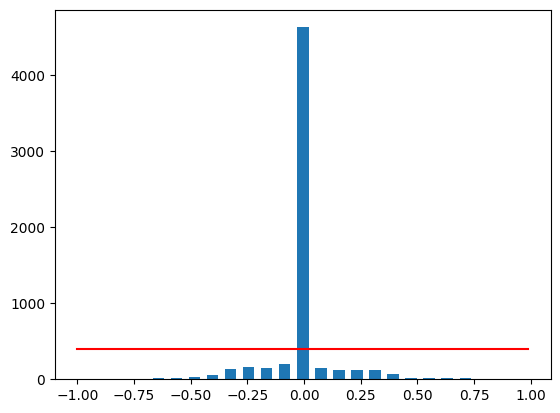

In [6]:
# Define the number of bins for the histogram
num_bins = 25

# Define the desired number of samples per bin for the horizontal line
samples_per_bin = 400

# Compute the histogram of steering angles
hist, bins = np.histogram(data['steering'], num_bins)  # Calculate histogram of 'steering' column with specified number of bins

# Compute the center positions of each bin
center = (bins[:-1] + bins[1:]) * 0.5  # Calculate the center positions between bin edges

# Create a bar plot to visualize the steering angle distribution
plt.bar(center, hist, width=0.05)  # Plot the histogram using bar chart with specified bin centers, histogram values, and bar width

# Plot a horizontal line to indicate the desired number of samples per bin
plt.plot([np.min(data['steering']), np.max(data['steering'])], [samples_per_bin, samples_per_bin], color='r')
# Use plt.plot() to draw a horizontal line across the entire range of steering angles, indicating 'samples_per_bin'
# Specify x values as [np.min(data['steering']), np.max(data['steering'])] and y values as [samples_per_bin, samples_per_bin]
# Set color to 'r' (red) for the line

# Display the plot
plt.show()  # Show the plotted histogram with the horizontal line

The plot shows that the car mostly drives straight, staying in the middle of the road. But having too many straight angles could make the car predict "straight" too often. To fix this, we can simply reduce how often the car sees straight angles. We can decide how much to reduce them by setting a limit.<br>
<br>
Problem:
  > Bias towards the ZERO (will start predicting zeroes more)<br>
  
Solution: (using LINE 5 above " samples_per_bin")
  > Remove some of the zeroes from the distribution

  > Make one threshold to check how much zeroes can be removed

The code below tells us two things about our dataset: first, how many data points it has in total, and second, its shape or dimensions (number of rows and columns). It's a quick way to get an idea of the dataset's size and structure.

In [7]:
# Print the total number of data points in the DataFrame
print('Total Data:', len(data))  # Display the total number of rows (data points) in the DataFrame using len(data)

# Print the shape (dimensions) of the DataFrame
print(data.shape)  # Display the shape (number of rows, number of columns) of the DataFrame using data.shape

Total Data: 6040
(6040, 7)


This code fixes the problem of having too many zero steering angles in the dataset. It makes a copy of the original data and then goes through each group of steering angles. For each group, it shuffles the data points and keeps only the desired number of samples. After removing the excess samples, it updates the dataset to have a more balanced distribution of steering angles. Finally, it prints out how many data points were removed and how many remain.

In simple terms, the code below is checking if the number of zeros is the same as the threshold, and if not, it removes the excess zeros.

In [8]:
# Create a copy of the DataFrame to avoid modifying the original data
# filtered_data = data.copy()
remove_list = []

for j in range(num_bins):
    # Initialize a list to store indices of data points within the current bin
    bin_indices = []

    # Iterate through each data point (steering angle) in the DataFrame
    for i in range(len(data['steering'])):
        # Check if the steering angle of the current data point falls within the current bin range
        if data['steering'][i] >= bins[j] and data['steering'][i] <= bins[j+1]:
            bin_indices.append(i)  # Add the index of the data point to the list for the current bin

    # Shuffle the list of indices within the current bin
    shuffled_indices = shuffle(bin_indices)

    # Remove excess samples (if any) beyond the desired 'samples_per_bin'
    indices_to_remove = shuffled_indices[samples_per_bin:]

    remove_list.extend(indices_to_remove)

# Display the number of data points removed for the current bin
print('Removed:', len(remove_list))

# Filter the DataFrame to retain only the desired data points (indices not in indices_to_remove)
data.drop(data.index[remove_list], inplace=True)

# Display the number of remaining data points in the filtered_data DataFrame after removal
print('Remaining:', len(data))

Removed: 4229
Remaining: 1811


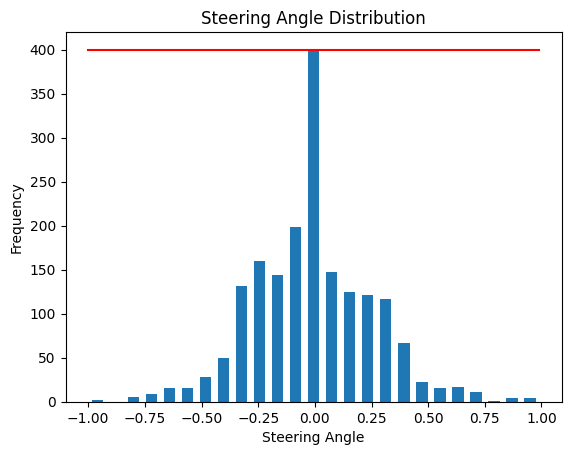

In [9]:
# Calculate the histogram of steering angles
hist, _ = np.histogram(data['steering'], num_bins)

# Plot the histogram of steering angles
plt.bar(center, hist, width=0.05)  # Plot the histogram using bar chart with specified bin centers, histogram values, and bar width

# Plot a horizontal line to indicate 'samples_per_bin'
plt.plot([np.min(data['steering']), np.max(data['steering'])], [samples_per_bin, samples_per_bin], color='r')  # Use plt.plot() to draw a horizontal line across the entire range of steering angles, indicating 'samples_per_bin'
# Specify x values as [np.min(data['steering']), np.max(data['steering'])] and y values as [samples_per_bin, samples_per_bin]
# Set color to 'r' (red) for the line

# Set plot labels and title
plt.xlabel('Steering Angle')  # Set label for x-axis
plt.ylabel('Frequency')  # Set label for y-axis
plt.title('Steering Angle Distribution')  # Set title for the plot

# Show the plot
plt.show()  # Show the plotted histogram with the horizontal line

This histogram is used to visualize the distribution of steering angles in the dataset. It calculates the histogram of steering angles using the specified number of bins, then plots it as a bar chart. Additionally, it adds a horizontal line to indicate a certain threshold value.

The code below prepares image paths and their steering angles from a DataFrame for further analysis. It extracts paths for center, left, and right images along with their associated steering angles, adjusts the angles, and stores them in lists. Then, it converts these lists into NumPy arrays for efficient processing and displays the total number of data points processed.

In [10]:
def load_img_steering(datadir, df):
    image_paths = []  # List to store image paths
    steerings = []    # List to store steering angles

    for i in range(len(df)):
        # Extract row data using .iloc[i]
        indexed_data = df.iloc[i]

        # Extract 'center', 'left', and 'right' image paths from the indexed_data
        center = indexed_data['center'].strip()  # Image path for the center camera
        left = indexed_data['left'].strip()      # Image path for the left camera
        right = indexed_data['right'].strip()    # Image path for the right camera

        # Append full image paths to image_paths list
        image_paths.extend([os.path.join(datadir, center),
                            os.path.join(datadir, left),
                            os.path.join(datadir, right)])

        # Extract the steering angle and convert it to float
        steering_angle = float(indexed_data['steering'])

        # Append steering angles to steerings list
        steerings.extend([steering_angle,
                          steering_angle + 0.15,
                          steering_angle - 0.15])

    # Convert lists to numpy arrays for efficient processing
    image_paths = np.asarray(image_paths)
    steerings = np.asarray(steerings)

    # Display the number of data points processed
    print(f"Total data points processed: {len(image_paths)}")

    return image_paths, steerings

In [11]:
# Load image paths and corresponding steering angles using the specified directory and DataFrame
image_paths, steerings = load_img_steering(datadir + '/IMG', data)

Total data points processed: 5433


The code below divides the dataset into training and validation sets using a function called train_test_split. It then prints the number of samples in each set for reference.

In [12]:
# Split the data into training and validation sets using train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(image_paths, steerings, test_size=0.2, random_state=6)

# Display the number of samples in the training and validation sets
print('Training Samples: {}\nValid Samples: {}'.format(len(X_train), len(X_valid)))

Training Samples: 4346
Valid Samples: 1087


This code plots the distribution of the steering angles in both the training and validation datasets, which is crucial for understanding the balance and spread of the data. It creates a figure with two subplots, one for the training set and the other for the validation set, each displaying a histogram of the steering angles. This visualization helps ensure that both datasets cover a similar range of steering angles, which is essential for training and evaluating the model effectively.

Text(0.5, 1.0, 'Validation Set')

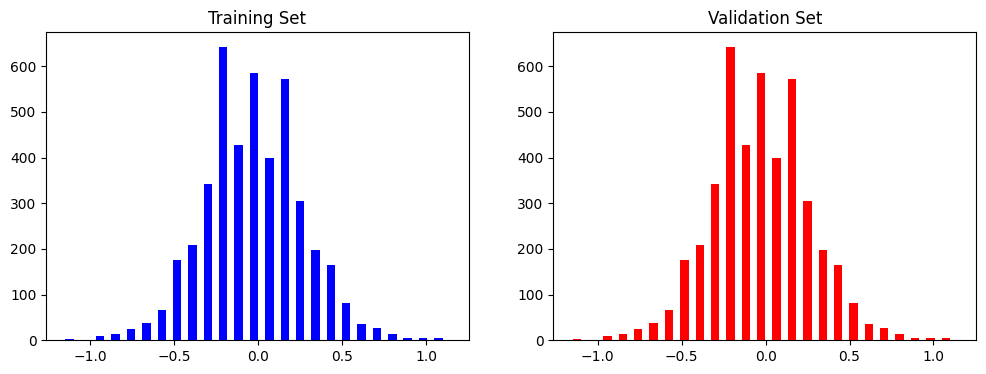

In [13]:
# Plot the distribution of the training and validation datasets
# Create a figure with two subplots: 1 row, 2 columns
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Plot histogram for the training set on the first subplot (axes[0])
axes[0].hist(y_train, bins=num_bins, width=0.05, color='blue')
axes[0].set_title('Training Set')  # Set title for the training set subplot

# Plot histogram for the validation set on the second subplot (axes[1])
axes[1].hist(y_train, bins=num_bins, width=0.05, color='red')
axes[1].set_title('Validation Set')  # Set title for the validation set subplot

This code implements a zooming augmentation technique to enhance the robustness of a model.

In [14]:
# Augmentation techniques (to make the model robust)

# Zooming Augmentation Techniques
def zoom(image):
    zoom_augmenter = iaa.Affine(scale=(1, 1.3))  # Define zoom augmentation with scale factor
    zoomed_image = zoom_augmenter.augment_image(image)  # Apply zoom augmentation to the image
    return zoomed_image

# Read one image randomly from image_paths list
image = image_paths[random.randint(0, 1000)]  # Select a random image path from image_paths
original_image = mpimg.imread(image)  # Read the original image from the selected path
zoomed_image = zoom(original_image)  # Apply zoom augmentation to the original image

The code below defines a function to apply panning augmentation to an input image and demonstrates its usage by randomly selecting an image from a list and applying panning augmentation to it.

In [16]:
# Another Augmentation technique: "PAN"
# Notice the Black part in the corner ***
def pan(image):
    # Define pan (translation) augmentation
    pan_augmenter = iaa.Affine(translate_percent={"x": (-0.1, 0.1), "y": (-0.1, 0.1)})
    # Apply pan augmentation to the image
    panned_image = pan_augmenter.augment_image(image)
    return panned_image

# Read one image randomly from image_paths list
image = image_paths[random.randint(0, 1000)]  # Select a random image path from image_paths
# Read the original image from the selected path
original_image = mpimg.imread(image)
# Apply pan (translation) augmentation to the original image
panned_image = pan(original_image)

Brightness Augmentation technique introduces variability to image datasets by randomly adjusting brightness levels within a specified range.

In [15]:
# Another Augmentation technique: "Brightness"
def image_random_brightness(image):
    # Define brightness augmentation
    brightness_augmenter = iaa.Multiply((0.2, 1.2))
    # Apply brightness augmentation to the image
    brightness_altered_image = brightness_augmenter.augment_image(image)
    return brightness_altered_image

# Read one image randomly from image_paths list
image = image_paths[random.randint(0, 1000)]  # Select a random image path from image_paths
# Read the original image from the selected path
original_image = mpimg.imread(image)
# Apply random brightness alteration to the original image
brightness_altered_image = image_random_brightness(original_image)

This code flips images horizontally using the OpenCV library to augment the dataset, making it more diverse and robust. It also adjusts the steering angles accordingly to maintain consistency in training data representation.

In [17]:
# Another Augmentation technique: "Flip"
def img_random_flip(image, steering_angle):
    # Flip the image horizontally
    flipped_image = cv2.flip(image, 1)
    # Invert the steering angle for horizontal flip
    flipped_steering_angle = -steering_angle
    return flipped_image, flipped_steering_angle

# Read one image randomly from image_paths list
random_index = random.randint(0, 1000)  # Generate a random index within the range of image_paths
image = image_paths[random_index]  # Select a random image path from image_paths
steering_angle = steerings[random_index]  # Get the corresponding steering angle for the selected image

# Read the original image from the selected path
original_image = mpimg.imread(image)
# Apply random flip and adjust steering angle
flipped_image, flipped_steering_angle = img_random_flip(original_image, steering_angle)

This function takes a list of input images and a tuple specifying the shape of the mosaic (number of rows and columns). It then iterates through the input images, placing each image at the corresponding position in the mosaic grid.

In [18]:
def create_mosaic(images, mosaic_shape):
    # Extract the number of rows and columns from the mosaic shape
    rows, cols = mosaic_shape
    # Initialize a blank mosaic image with the specified shape
    mosaic_image = np.zeros((rows, cols, 3), dtype=np.uint8)

    # Iterate over the input images and place each image at the corresponding position in the mosaic
    for i, image in enumerate(images):
        # Calculate the row and column indices for the current image
        row_idx = i // cols
        col_idx = i % cols
        # Place the current image at the correct position in the mosaic
        mosaic_image[row_idx * image.shape[0]:(row_idx + 1) * image.shape[0],
                     col_idx * image.shape[1]:(col_idx + 1) * image.shape[1]] = image

    # Return the merged mosaic image
    return mosaic_image

# **MAIN DATA AUGMENTATION**


This function applies random augmentation techniques to an input image based on random probabilities. It first reads the image if it's provided as a file path. Then, it applies pan, zoom, brightness alteration, and flip augmentations with a 50% chance for each.

In [19]:
# Final Function for Random Image Augmentation
def random_augment(image, steering_angle):

    # Read the image if it's given as a path
    image = mpimg.imread(image)

    # Apply random pan augmentation with a 50% chance
    if np.random.rand() < 0.5:
        image = pan(image)  # Apply pan augmentation

    # Apply random zoom augmentation with a 50% chance
    if np.random.rand() < 0.5:
        image = zoom(image)  # Apply zoom augmentation

    # Apply random brightness alteration with a 50% chance
    if np.random.rand() < 0.5:
        image = image_random_brightness(image)  # Apply brightness alteration

    # Apply random flip augmentation with a 50% chance and adjust steering angle accordingly
    if np.random.rand() < 0.5:
        image, steering_angle = img_random_flip(image, steering_angle)  # Apply flip augmentation

    return image, steering_angle

This code sets up a grid of plots to show both the original and enhanced images together. It goes through 10 iterations, randomly choosing an image and its associated steering angle. Then, it reads the original image, applies random enhancements, and finally displays both versions side by side in the grid.

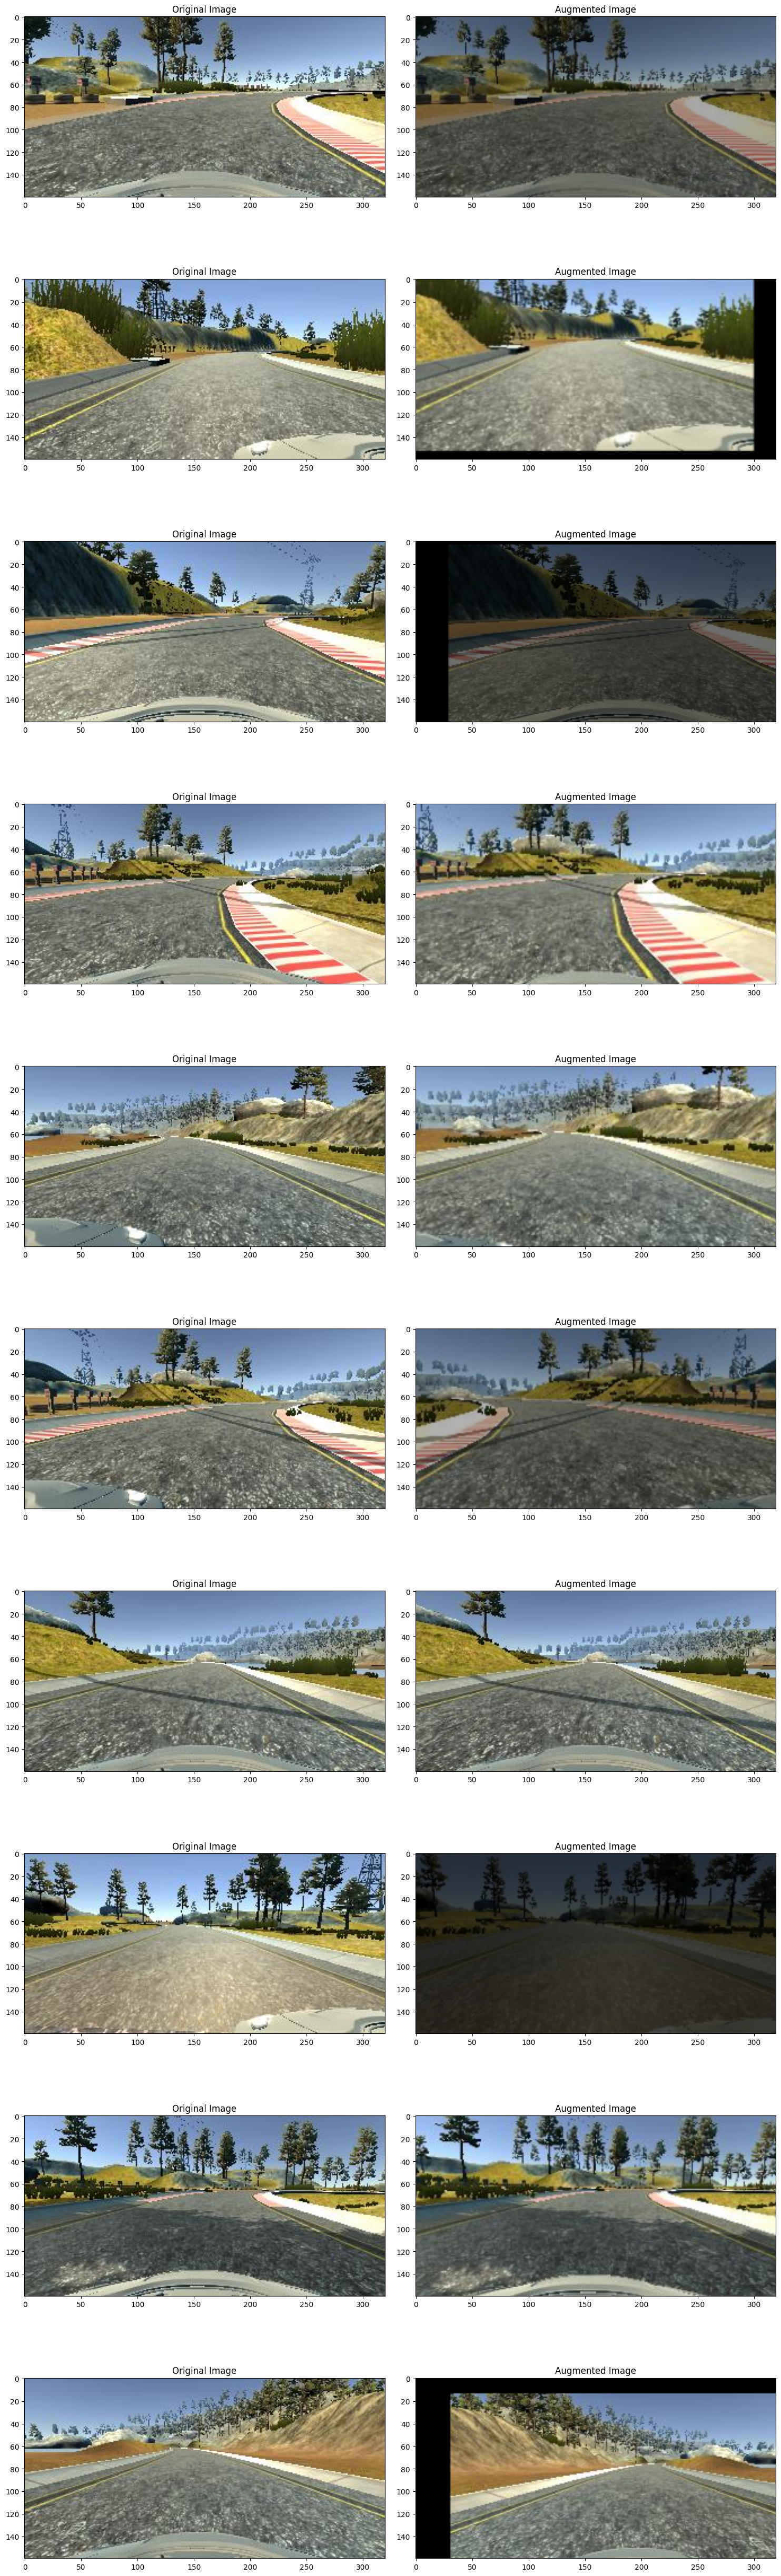

In [20]:
# Define the number of columns (subplots per row) and rows (total subplot rows)
ncol = 2
nrow = 10

# Create a figure with subplots arranged in a grid of nrow rows and ncol columns
fig, axs = plt.subplots(nrow, ncol, figsize=(15, 50))

# Adjust the layout of the subplots to prevent overlap
fig.tight_layout()

# Iterate over a specified number of iterations (in this case, 10)
for i in range(10):
    # Generate a random index within the range of available image paths
    randnum = random.randint(0, len(image_paths) - 1)

    # Retrieve a random image path and its associated steering angle
    random_image = image_paths[randnum]
    random_steering = steerings[randnum]

    # Read the original image from the random image path
    original_image = mpimg.imread(random_image)

    # Apply random augmentation to the original image
    augmented_image, steering = random_augment(random_image, random_steering)

    # Display the original image in the first subplot of the current row (i-th row, 0-th column)
    axs[i][0].imshow(original_image)
    axs[i][0].set_title("Original Image")

    # Display the augmented image in the second subplot of the current row (i-th row, 1-st column)
    axs[i][1].imshow(augmented_image)
    axs[i][1].set_title("Augmented Image")

# Image Preprocessing

Preprocess the input image by removing the background through cropping, converting to YUV color space, applying Gaussian blur, resizing, and normalizing pixel values.

  Parameters:
    - img (ndarray): Input image to be preprocessed.

  Returns:
    - img (ndarray): Preprocessed image.

In [21]:
def img_preprocess(img):
    # Crop the image to remove background
    img = img[60:135,:,:]

    # Convert image to YUV color space (NVIDIA model requirement)
    img = cv2.cvtColor(img, cv2.COLOR_RGB2YUV)

    # Apply Gaussian blur
    img = cv2.GaussianBlur(img, (3, 3), 0)

    # Resize the image
    img = cv2.resize(img, (200, 66))

    # Normalize pixel values
    img = img/255

    return img

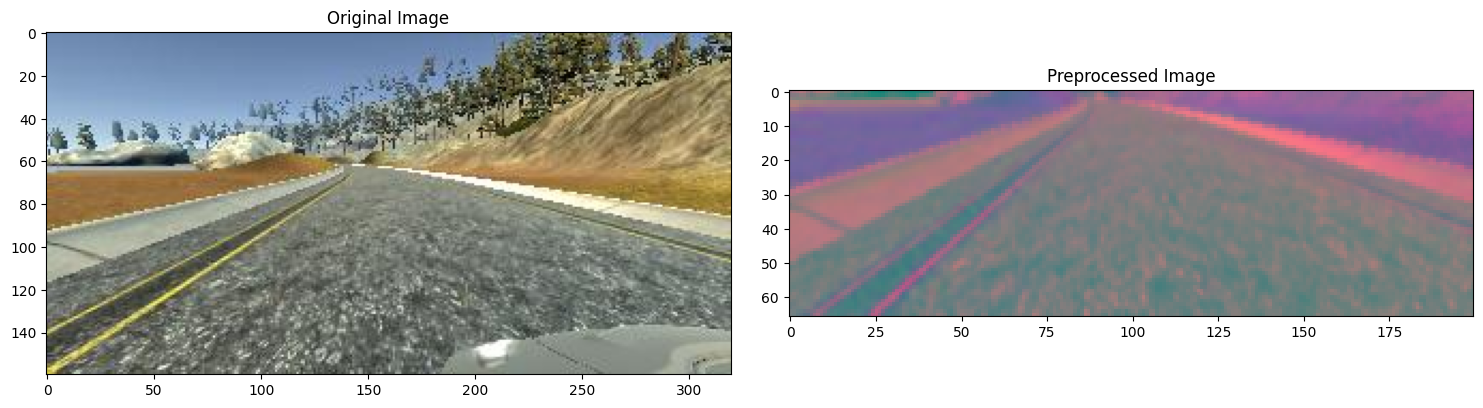

In [22]:
# Testing on one image
# Select a specific image path from the list (e.g., index 100)
image = image_paths[100]

# Read the original image using matplotlib's imread function
original_image = mpimg.imread(image)

# Preprocess the original image (apply necessary preprocessing steps)
preprocessed_image = img_preprocess(original_image)

# Create a subplot with two columns (for original and preprocessed images)
fig, axs = plt.subplots(1, 2, figsize=(15, 10))  # Create subplots with 1 row and 2 columns
fig.tight_layout()  # Adjust layout to prevent overlap

# Display the original image in the first subplot
axs[0].imshow(original_image)
axs[0].set_title('Original Image')

# Display the preprocessed image in the second subplot
axs[1].imshow(preprocessed_image)
axs[1].set_title('Preprocessed Image')

# Show the plot with both original and preprocessed images
plt.show()

Generate batches of images and corresponding steering angles.

  Parameters:<br>
    - image_paths (list): List of image file paths.<br>
    - steering_ang (list): List of steering angles associated with images.<br>
    - batch_size (int): Size of each batch.<br>
    - istraining (bool): Flag indicating whether the generator is used for training.<br>
<br>
  Yields:<br>
    - tuple: Tuple containing batch of images and corresponding steering angles.

In [23]:
# Batch Generator Function
def batch_generator(image_paths, steering_ang, batch_size, istraining):
    while True:
        batch_img = []
        batch_steering = []

        for i in range(batch_size):
            random_index = random.randint(0, len(image_paths) - 1)

            if istraining:
                # Apply random augmentation during training
                im, steering = random_augment(image_paths[random_index], steering_ang[random_index])
            else:
                # Read original image during validation/testing
                im = mpimg.imread(image_paths[random_index])
                steering = steering_ang[random_index]

            # Preprocess the image
            im = img_preprocess(im)

            # Append preprocessed image and steering angle to batch lists
            batch_img.append(im)
            batch_steering.append(steering)

        # Yield batch of images and steering angles
        yield (np.asarray(batch_img), np.asarray(batch_steering))

Generates a single batch of training data and labels, as well as a single batch of validation data and labels, using a batch generator function

In [24]:
# Generate a single batch of training data and corresponding labels
x_train_gen, y_train_gen = next(batch_generator(X_train, y_train, 1, 1))

# Generate a single batch of validation data and corresponding labels
x_valid_gen, y_valid_gen = next(batch_generator(X_valid, y_valid, 1, 0))

# Implementing NVIDIA MODEL

Define the NVIDIA model architecture for autonomous vehicle steering angle prediction.

  Returns:<br>
    - model (Sequential): NVIDIA model instance.

This code sets up a model using layers for recognizing patterns and making predictions, following a design suggested by NVIDIA. It also prepares the model to learn from its mistakes by defining how it will measure errors and adjust its parameters to minimize them.

In [25]:
def nvidia_model():
    model = Sequential()
    # Convolutional layers
    model.add(Conv2D(24, (5, 5), strides=(2, 2), input_shape=(66, 200, 3), activation='elu')) # Check in NVIDIA Paper
    model.add(Conv2D(36, (5, 5), strides=(2, 2), activation='elu'))
    model.add(Conv2D(48, (5, 5), strides=(2, 2), activation='elu'))
    model.add(Conv2D(64, (3, 3), activation='elu'))  # Changed kernel size for final convolution

    model.add(Flatten())

    # Fully connected layers
    model.add(Dense(100, activation='elu'))
    model.add(Dense(50, activation='elu'))
    model.add(Dense(10, activation='elu'))
    model.add(Dense(1))

    optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
    model.compile(loss='mse', optimizer=optimizer)
    return model

# Instantiate the NVIDIA model
model = nvidia_model()

# Print model summary
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 31, 98, 24)        1824      
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 47, 36)        21636     
                                                                 
 conv2d_2 (Conv2D)           (None, 5, 22, 48)         43248     
                                                                 
 conv2d_3 (Conv2D)           (None, 3, 20, 64)         27712     
                                                                 
 flatten (Flatten)           (None, 3840)              0         
                                                                 
 dense (Dense)               (None, 100)               384100    
                                                                 
 dense_1 (Dense)             (None, 50)                5

# Model Training



In [ ]:
# Train the model using the batch generator for training data and steps per epoch
# Use 300 steps per epoch for 10 epochs, with validation data from the batch generator and 200 validation steps
# Set verbose mode to 1 for progress updates and shuffle the data during training
history = model.fit_generator(batch_generator(X_train, y_train, 100, 1),
                              steps_per_epoch=300, epochs=10,
                              validation_data=batch_generator(X_valid, y_valid, 100, 0),
                              validation_steps=200,
                              verbose=1, shuffle=1)

Plots the training and validation loss over epochs, providing insight into the model's performance during training and validation phases.

Text(0.5, 0, 'Epoch')

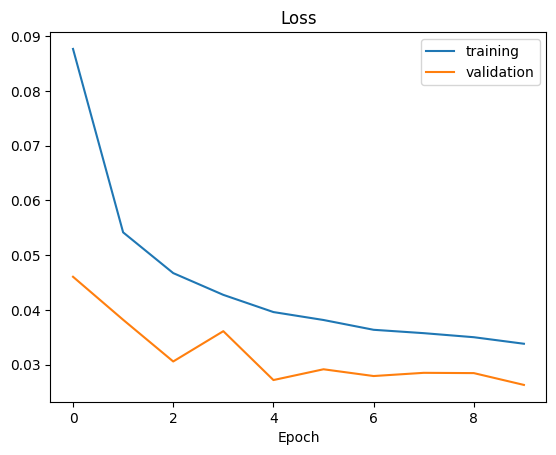

In [26]:
# Plot training and validation loss
plt.plot(history.history['loss'])  # Plot training loss
plt.plot(history.history['val_loss'])  # Plot validation loss
plt.legend(['training', 'validation'])  # Add legend labels for training and validation
plt.title('Loss')  # Set title for the plot
plt.xlabel('Epoch')  # Set label for x-axis

# A separate file named "drive.py" will contain the underlying logic.

In [27]:
# Save the trained model to a file named 'model.h5'
model.save('model.h5')

# Download the saved model file from Google Colab
from google.colab import files
files.download('model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

VIDEO 11 below (starting point)